In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import os 
import sys
import warnings
warnings.simplefilter(action = 'ignore')

In [168]:
crime_data = pd.read_csv('/0.ITstudy/9.pandas_data/Detroit_2016.csv')


In [169]:
crime_data.head()

,Unnamed: 0,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,...,Precinct Number,Census Block GEOID,Neighborhood,Council District,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq
0,325,3108829,1708240413,18200 block of MANSFIELD ST,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,11/20/2016 12:00:00 PM,...,8,2.616350e+14,College Park,2.0,NaN,-83.206111,42.423438,08/26/2017 09:52:03 AM,"location\r\n(42.42344, -83.20611)","59,357"
1,1036,3116797,1709130179,7900 block of HARTWICK ST,LARCENY - OTHER,LARCENY,23007,LARCENY - OTHER,2307,03/09/2016 12:00:00 AM,...,3,2.616400e+14,Russell Industrial,5.0,NaN,-83.060791,42.380547,09/14/2017 08:28:25 AM,"location\r\n(42.38055, -83.06079)","63,817"
2,1118,3005365,1612230008,Corner of W 7 MILE RD and TELEGRAPH RD,AGGRAVATED / FELONIOUS ASSAULT,AGGRAVATED ASSAULT,13002,AGGRAVATED / FELONIOUS ASSAULT,1302,12/22/2016 11:50:00 PM,...,8,2.616350e+14,Seven Mile-Rouge,1.0,NaN,-83.277544,42.428957,01/27/2017 03:08:19 PM,"location\r\n(42.42896, -83.27754)","3,096"
3,1282,3007218,1612280364,1700 block of MICHIGAN AVE,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,LARCENY,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,12/28/2016 08:30:00 PM,...,3,2.616350e+14,Corktown,6.0,NaN,-83.069540,42.331420,01/27/2017 03:08:19 PM,"location\r\n(42.33142, -83.06954)","4,196"
4,1371,3008368,1612310290,19200 block of W 8 MILE RD,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,LARCENY,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,12/31/2016 01:00:00 AM,...,8,2.616350e+14,O'Hair Park,1.0,NaN,-83.232364,42.443863,01/27/2017 03:08:19 PM,"location\r\n(42.44386, -83.23236)","4,883"


In [170]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 25 columns):
Unnamed: 0                   6003 non-null int64
Crime ID                     6003 non-null int64
Report #                     6003 non-null object
Incident Address             6003 non-null object
Offense Description          6003 non-null object
Offense Category             6003 non-null object
Arrest Charge                6003 non-null object
Charge Description           6003 non-null object
State Offense Code           6003 non-null int64
Incident Date & Time         6003 non-null object
Incident Time (24h)          6003 non-null int64
Day of Week (Sunday is 1)    6003 non-null int64
Hour of Day                  6003 non-null int64
Year                         6003 non-null int64
Scout Car Area               6003 non-null int64
Precinct Number              6003 non-null int64
Census Block GEOID           5982 non-null float64
Neighborhood                 5938 non-null object
C

In [171]:
crime_data.isnull().any()

Unnamed: 0                   False
Crime ID                     False
Report #                     False
Incident Address             False
Offense Description          False
Offense Category             False
Arrest Charge                False
Charge Description           False
State Offense Code           False
Incident Date & Time         False
Incident Time (24h)          False
Day of Week (Sunday is 1)    False
Hour of Day                  False
Year                         False
Scout Car Area               False
Precinct Number              False
Census Block GEOID            True
Neighborhood                  True
Council District              True
Zip Code                      True
Longitude                     True
Latitude                      True
IBR Report Date              False
Location                      True
uniq                         False
dtype: bool

In [172]:
crime_data['Offense Category'].unique()

array(['ASSAULT', 'LARCENY', 'AGGRAVATED ASSAULT', 'ROBBERY', 'OUIL',
       'WEAPONS OFFENSES', 'DAMAGE TO PROPERTY', 'MISCELLANEOUS',
       'BURGLARY', 'FRAUD', 'DISORDERLY CONDUCT', 'DANGEROUS DRUGS',
       'STOLEN VEHICLE', 'SEX OFFENSES', 'HOMICIDE', 'STOLEN PROPERTY',
       'FAMILY OFFENSE', 'SEXUAL ASSAULT', 'OBSTRUCTING JUDICIARY',
       'KIDNAPPING', 'FORGERY', 'EXTORTION', 'ARSON', 'OTHER', 'RUNAWAY',
       'LIQUOR', 'OBSTRUCTING THE POLICE', 'SOLICITATION'], dtype=object)

In [173]:
len(crime_data['Offense Category'].unique())

28

In [174]:
crime_data.loc[(crime_data['Offense Category'] =='HOMICIDE'),'Offense Category'].count()

9

In [175]:
def year_ex(x):
    year_reg = re.compile(r'\d{4}')
    return(year_reg.findall(x)[0])
def month_ex(x):
    month_reg = re.compile(r'\d{2}/\d{2}')
    return(month_reg.findall(x)[0])
def time_ex(x):
    time_reg = re.compile(r'\d{2}:\d{2}:\d{2}')
    return(time_reg.findall(x)[0])
def day_night(x):
    day_reg = re.compile(r'[A-Z]+')
    return(day_reg.findall(x)[0])

In [176]:
month_ex('11/20/2016 12:00:00 PM')
time_ex('11/20/2016 12:00:00 PM')
day_night('11/20/2016 12:00:00 PM')

'PM'

In [177]:
dummy = crime_data.copy()
dummy['year']  = dummy['Incident Date & Time'].apply(year_ex).astype(int)
dummy['month'] = dummy['Incident Date & Time'].apply(month_ex)
dummy['time'] = dummy['Incident Date & Time'].apply(time_ex)
dummy['day'] = dummy['Incident Date & Time'].apply(day_night)
dummy[['time','month']] = dummy[['time','month']] .replace({'/':'',':':''},regex = True).astype('int64')

In [178]:
dummy.shape

(6003, 29)

In [179]:
dummy.head()

,Unnamed: 0,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,...,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq,year,month,time,day
0,325,3108829,1708240413,18200 block of MANSFIELD ST,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,11/20/2016 12:00:00 PM,...,NaN,-83.206111,42.423438,08/26/2017 09:52:03 AM,"location\r\n(42.42344, -83.20611)","59,357",2016,1120,120000,PM
1,1036,3116797,1709130179,7900 block of HARTWICK ST,LARCENY - OTHER,LARCENY,23007,LARCENY - OTHER,2307,03/09/2016 12:00:00 AM,...,NaN,-83.060791,42.380547,09/14/2017 08:28:25 AM,"location\r\n(42.38055, -83.06079)","63,817",2016,309,120000,AM
2,1118,3005365,1612230008,Corner of W 7 MILE RD and TELEGRAPH RD,AGGRAVATED / FELONIOUS ASSAULT,AGGRAVATED ASSAULT,13002,AGGRAVATED / FELONIOUS ASSAULT,1302,12/22/2016 11:50:00 PM,...,NaN,-83.277544,42.428957,01/27/2017 03:08:19 PM,"location\r\n(42.42896, -83.27754)","3,096",2016,1222,115000,PM
3,1282,3007218,1612280364,1700 block of MICHIGAN AVE,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,LARCENY,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,12/28/2016 08:30:00 PM,...,NaN,-83.069540,42.331420,01/27/2017 03:08:19 PM,"location\r\n(42.33142, -83.06954)","4,196",2016,1228,83000,PM
4,1371,3008368,1612310290,19200 block of W 8 MILE RD,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,LARCENY,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,12/31/2016 01:00:00 AM,...,NaN,-83.232364,42.443863,01/27/2017 03:08:19 PM,"location\r\n(42.44386, -83.23236)","4,883",2016,1231,10000,AM


In [226]:
print('Arrest Charge unique : ',len(dummy['Arrest Charge'].unique()))
print('State Offense Code : ',len(dummy['State Offense Code'].unique()))

Arrest Charge unique :  70
State Offense Code :  58


In [180]:
dummy.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 29 columns):
Unnamed: 0                   6003 non-null int64
Crime ID                     6003 non-null int64
Report #                     6003 non-null object
Incident Address             6003 non-null object
Offense Description          6003 non-null object
Offense Category             6003 non-null object
Arrest Charge                6003 non-null object
Charge Description           6003 non-null object
State Offense Code           6003 non-null int64
Incident Date & Time         6003 non-null object
Incident Time (24h)          6003 non-null int64
Day of Week (Sunday is 1)    6003 non-null int64
Hour of Day                  6003 non-null int64
Year                         6003 non-null int64
Scout Car Area               6003 non-null int64
Precinct Number              6003 non-null int64
Census Block GEOID           5982 non-null float64
Neighborhood                 5938 non-null object
C

In [181]:
dummy.loc[(dummy['Offense Category'] =='LIQUOR'),'Offense Category'].count()

9

In [182]:
liq_list =dummy.loc[(dummy['Offense Category'] == 'LIQUOR')]

In [183]:
run_list =dummy.loc[(dummy['Offense Category'] == 'RUNAWAY')]

In [184]:
pol_list =dummy.loc[(dummy['Offense Category'] == 'OBSTRUCTING THE POLICE')]

In [185]:
print('LIQUOR :', liq_list.count()[0])
print('RUNAWAY :', run_list.count()[0])
print('POLICE :', pol_list.count()[0])


LIQUOR : 9
RUNAWAY : 9
POLICE : 4


In [186]:
liq_list.index

Int64Index([1397, 2047, 2053, 2739, 3901, 4048, 4055, 4769, 5022], dtype='int64')

In [187]:
try:
    dummy = dummy.drop(liq_list.index, axis = 0)
except:
    print('not contain')

In [188]:
try:
    dummy = dummy.drop(run_list.index, axis = 0)
except:
    print('not contain')

In [189]:
try:
    dummy = dummy.drop(pol_list.index, axis = 0)
except:
    print('not contain')

In [190]:
dummy.shape

(5981, 29)

In [191]:
dummy.loc[(dummy['Offense Category'] =='LIQUOR')]

,Unnamed: 0,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,...,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq,year,month,time,day


In [192]:
dummy.loc[(dummy['Offense Category'] =='RUNAWAY')]

,Unnamed: 0,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,...,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq,year,month,time,day


In [193]:
dummy.loc[(dummy['Offense Category'] =='OBSTRUCTING THE POLICE')]

,Unnamed: 0,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,...,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq,year,month,time,day


In [194]:
#dummy.to_csv('destroit_2016_edit.csv')

In [195]:
dummy[(dummy['Offense Category'] == 'FRAUD')].count()[0]/dummy.shape[0] * 100

12.840662096639358

In [260]:

#print(dummy.loc[(dummy['State Offense Code'][:] == (dummy['Arrest Charge'][:][:3]+dummy['Arrest Charge'][:][4]))])

In [196]:
%matplotlib inline
import seaborn as sns


In [197]:
dummy_crime = (dummy['Offense Category'])

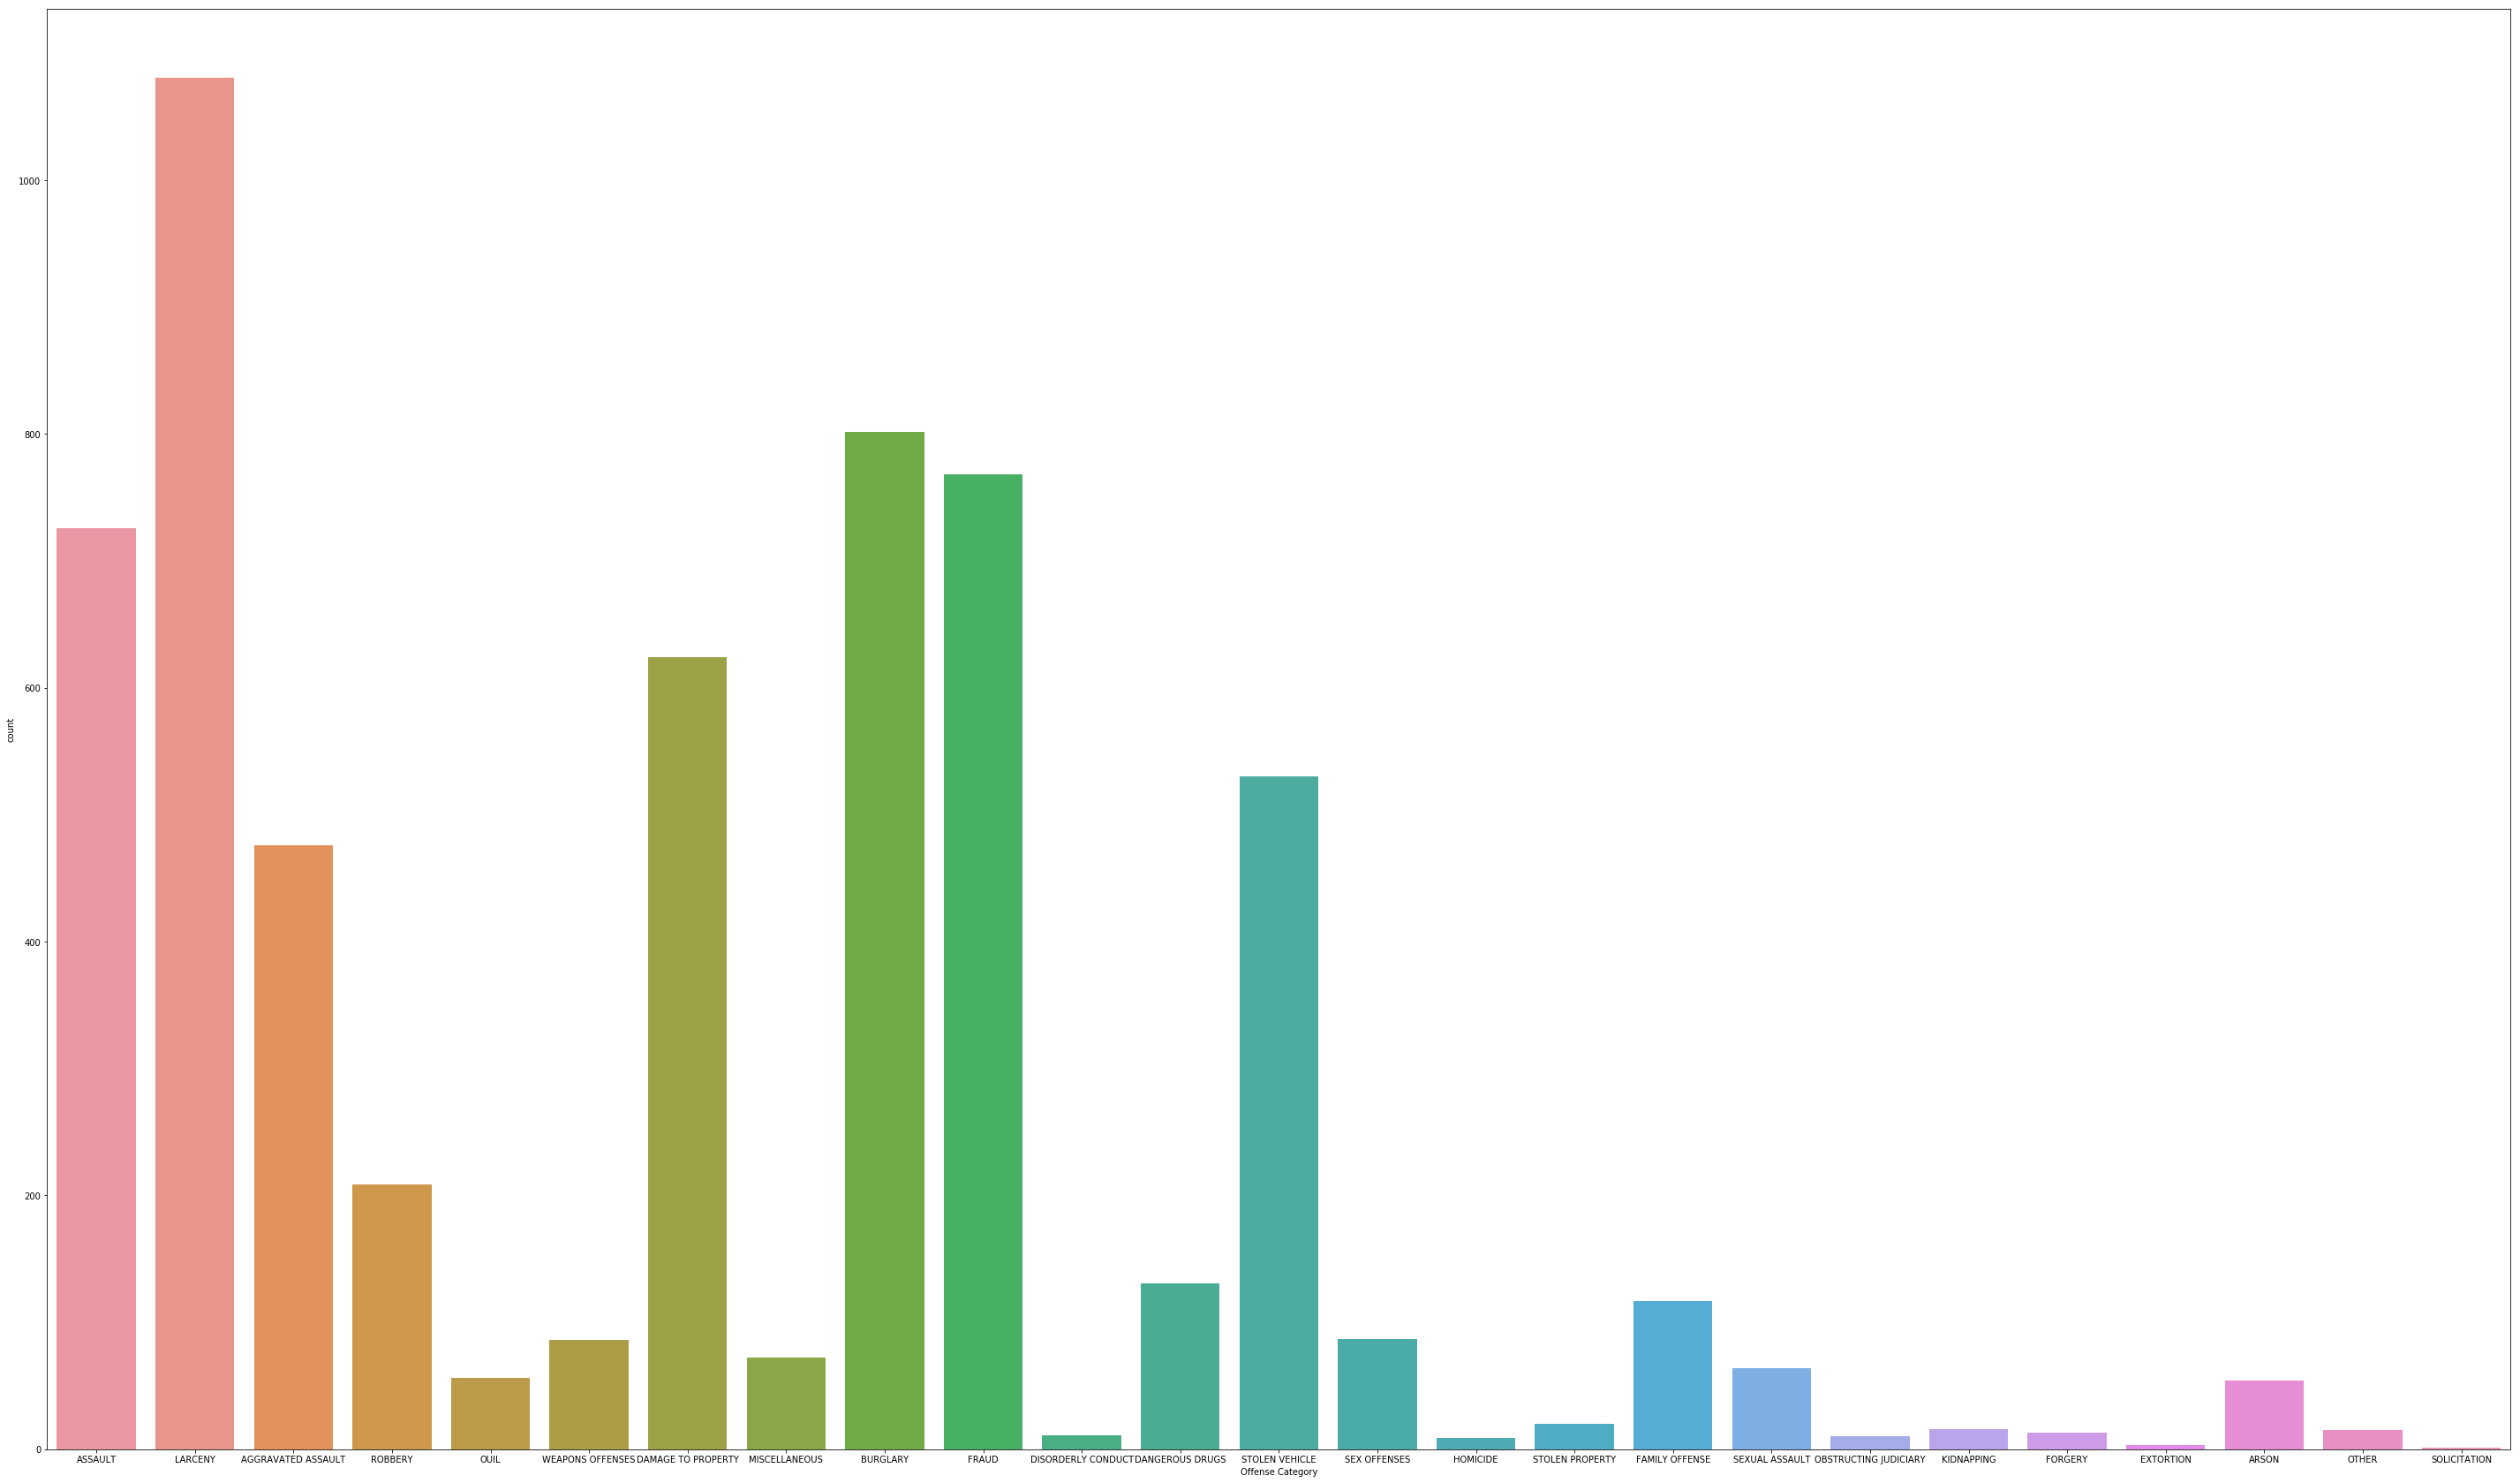

In [198]:
f,ax=plt.subplots(1,1,figsize=(50,30))

sns_plot = sns.countplot('Offense Category',data = dummy)
fig = sns_plot.get_figure()
fig.savefig('pic.png', dpi = 300)

In [199]:
dummy.loc[(dummy['Offense Category'] == 'JUSTIFIABLE HOMICIDE'),'Offense Category']= 'HOMICIDE'

In [200]:
dummy.loc[(dummy['Offense Category'] == 'SOLICITATION'),'Offense Category']= 'HOMICIDE'

In [201]:
dummy.loc[(dummy['Offense Category'] =='HOMICIDE'),'Offense Category'].count()

10

In [202]:
dummy.loc[(dummy['Offense Category'] =='SOLICITATAION'),'Offense Category'].count()

0

In [203]:
dummy.loc[(dummy['Offense Category'] == 'BURGLARY'),'Offense Category']= 'THEFT'

In [204]:
dummy.loc[(dummy['Offense Category'] == 'STOLEN PROPERTY'),'Offense Category']= 'THEFT'

In [205]:
dummy.loc[(dummy['Offense Category'] == 'LARCENY'),'Offense Category']= 'THEFT'

In [206]:
dummy.loc[(dummy['Offense Category'] == 'STOLEN VEHICLE'),'Offense Category']= 'THEFT'

In [207]:
assaults = ['FAMILY OFFENSE' ,'AGGRAVATED ASSAULT' ,'ASSAULT']
for i in assaults:
    dummy.loc[(dummy['Offense Category'] == i),'Offense Category']= 'ASSAULT'
    print(dummy.loc[(dummy['Offense Category'] == i),'Offense Category'].count())

0
0
1319


In [208]:
others = ['OTHER','MISCELLANEOUS']
for i in others:
    dummy.loc[(dummy['Offense Category'] == i),'Offense Category']= 'OTHER'
    print(dummy.loc[(dummy['Offense Category'] == i),'Offense Category'].count())

15
0


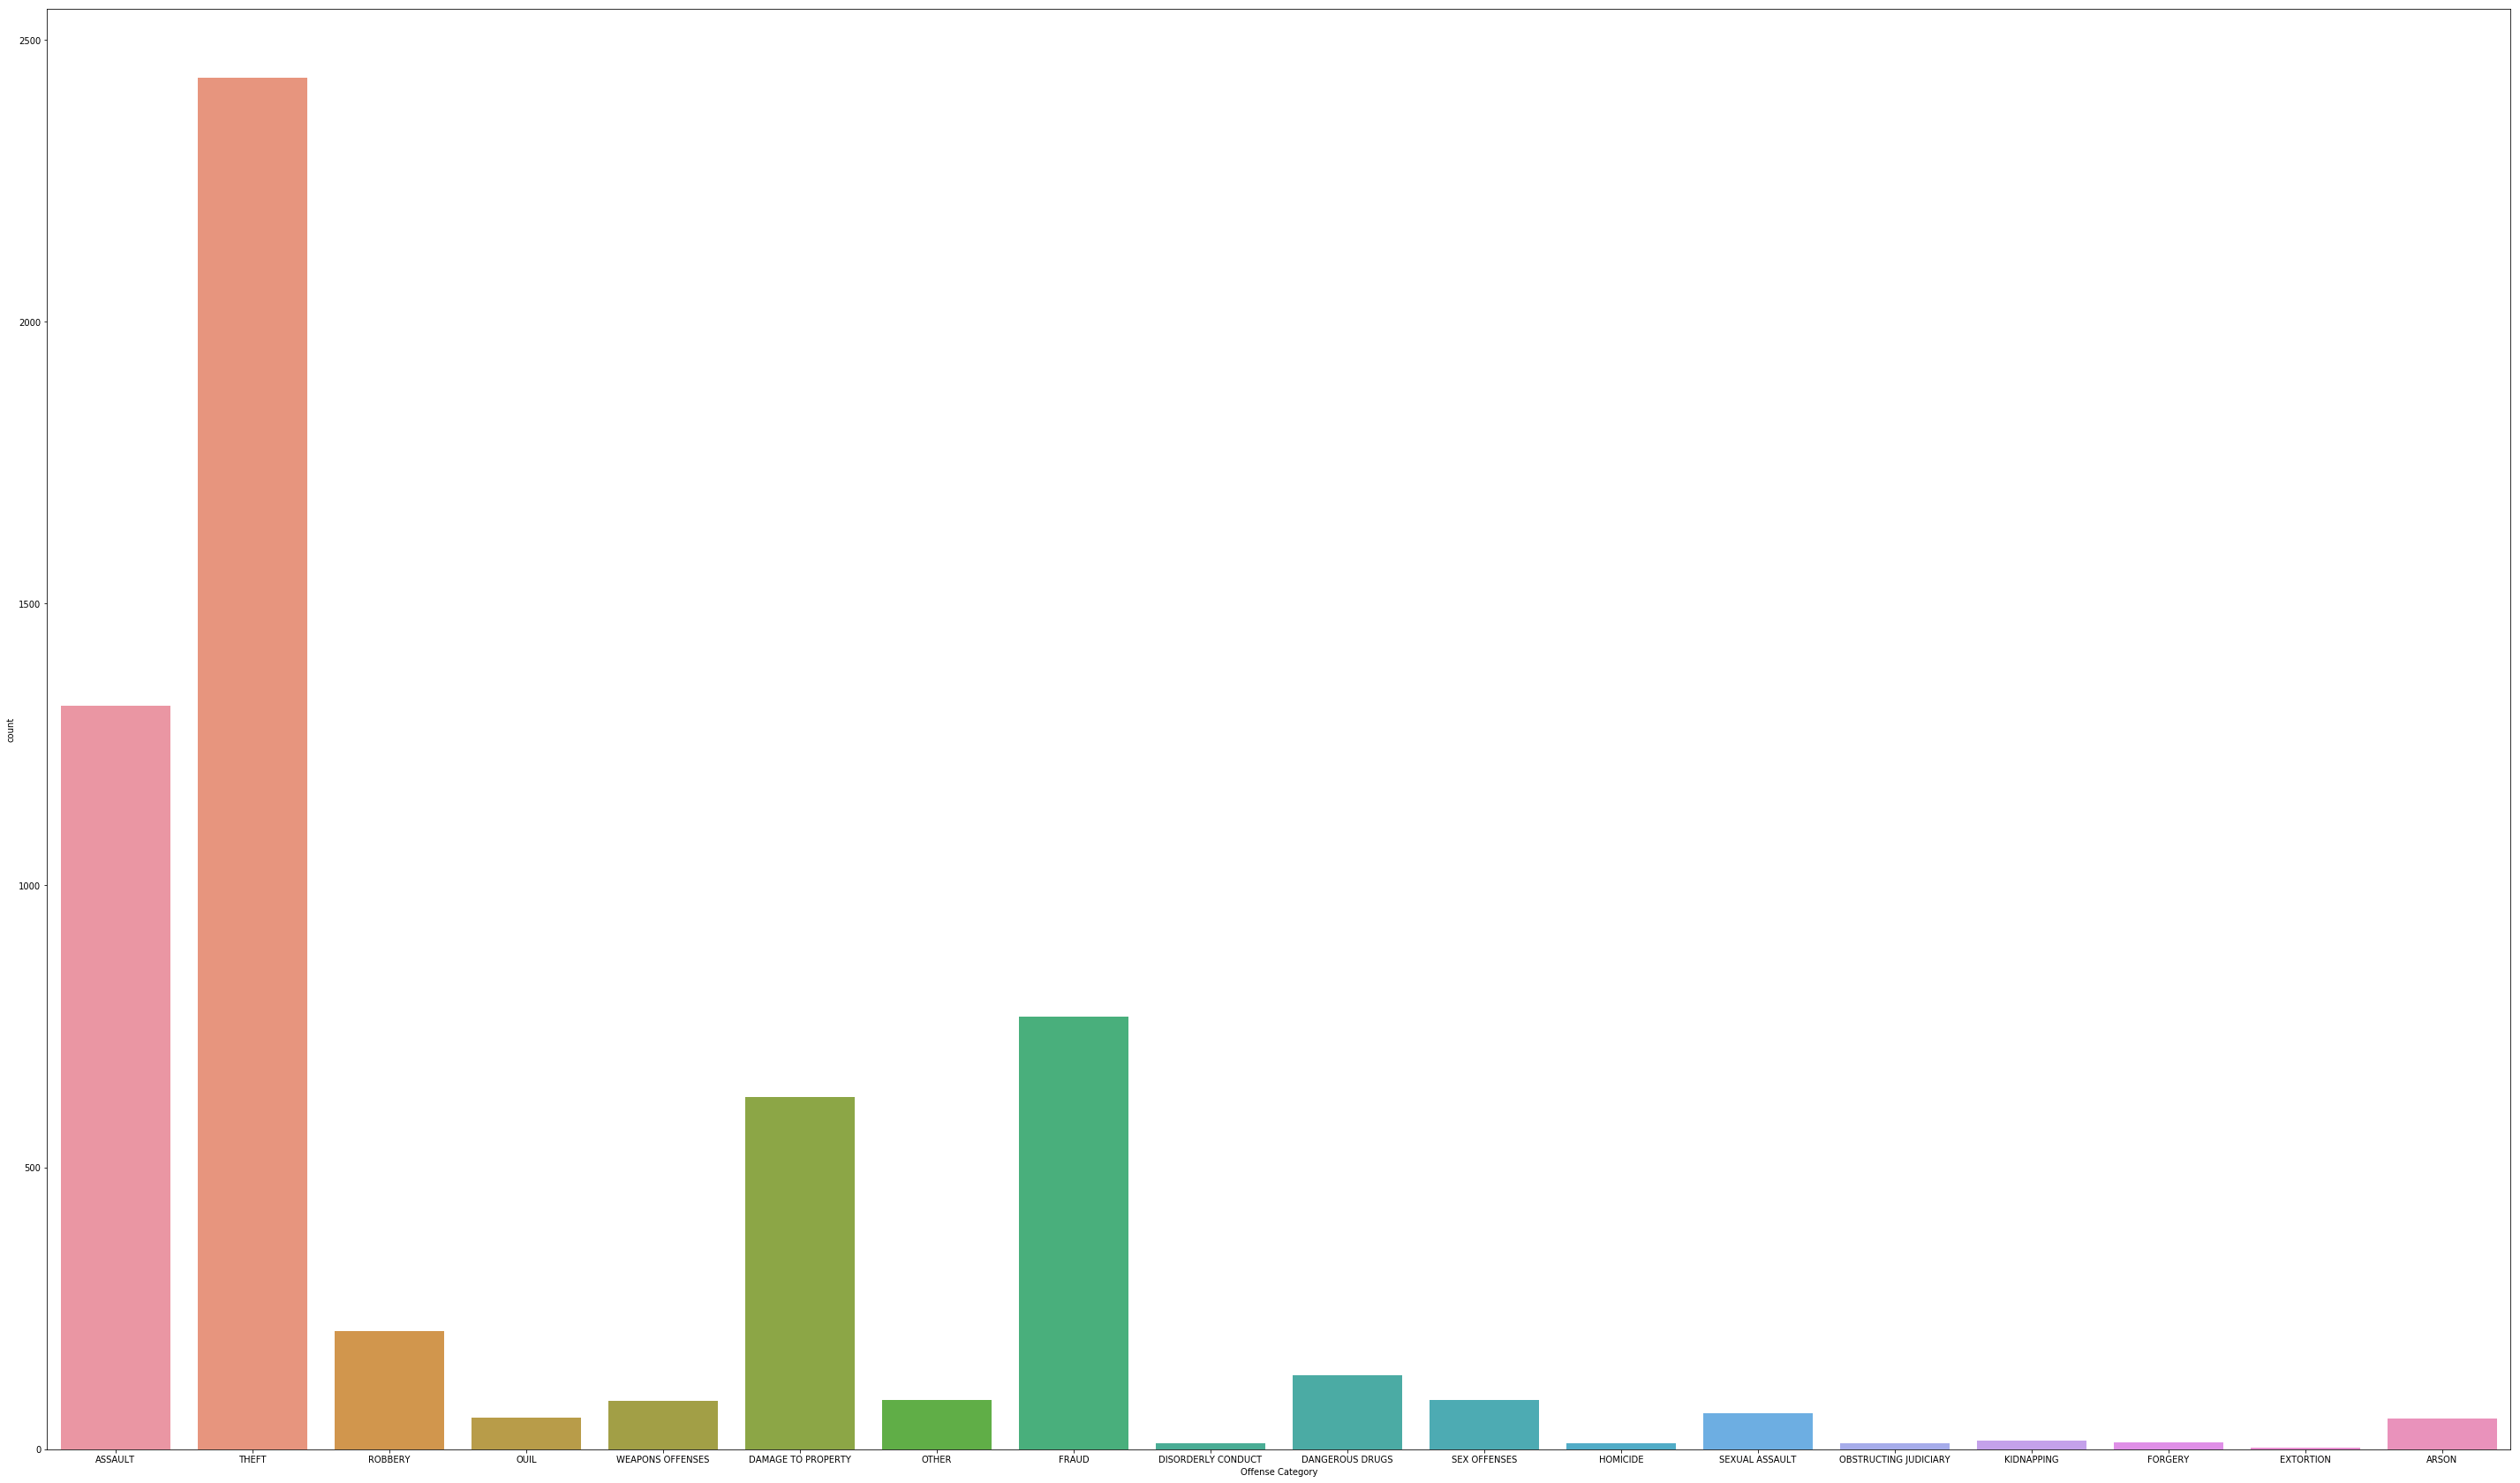

In [209]:
f,ax=plt.subplots(1,1,figsize=(50,30))

sns_plot = sns.countplot('Offense Category',data = dummy)
#fig = sns_plot.get_figure()
#fig.savefig('pic_result.png', dpi = 300)

In [210]:
dummy['Offense Category'].unique()

array(['ASSAULT', 'THEFT', 'ROBBERY', 'OUIL', 'WEAPONS OFFENSES',
       'DAMAGE TO PROPERTY', 'OTHER', 'FRAUD', 'DISORDERLY CONDUCT',
       'DANGEROUS DRUGS', 'SEX OFFENSES', 'HOMICIDE', 'SEXUAL ASSAULT',
       'OBSTRUCTING JUDICIARY', 'KIDNAPPING', 'FORGERY', 'EXTORTION',
       'ARSON'], dtype=object)

In [211]:
len(dummy['Offense Category'].unique())

18

In [212]:
len(crime_data['Offense Category'].unique())

28

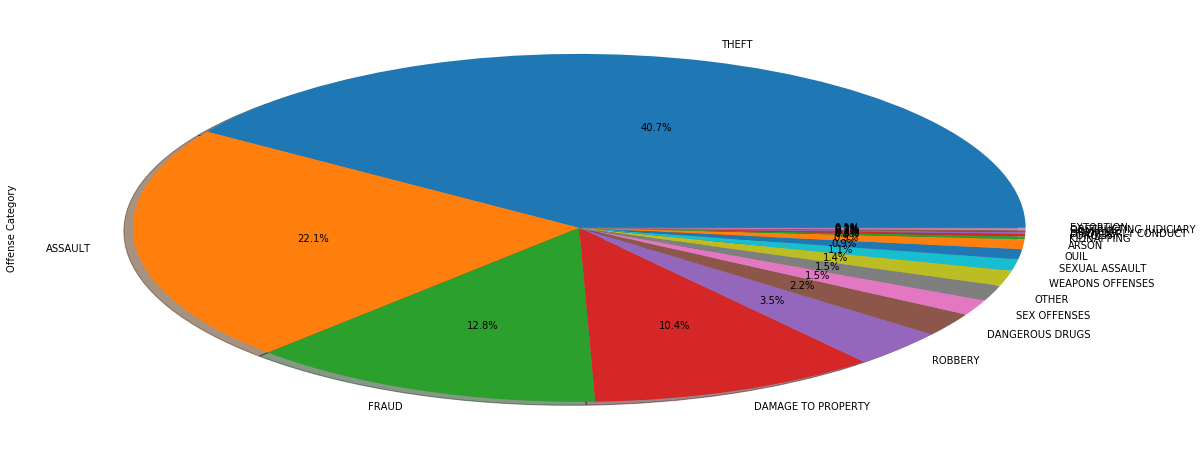

In [213]:
f,ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =dummy['Offense Category'].value_counts().plot.pie(explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',ax = ax,shadow = True)
#fig = plt_pie.get_figure()
#fig.savefig('pic_pie.png', dpi = 300)

In [214]:
TOP_7 = ['THEFT' ,'ASSAULT' ,'FRAUD','DAMAGE TO PROPERTY','ROBBERY','DANGERS DRUGS','SEX OFFENSES']
for n,i in enumerate(TOP_7):
    dummy.loc[(dummy['Offense Category'] == i),'RANKING']= n
dummy['RANKING']= dummy['RANKING'].fillna(7.0)

In [271]:
dummy['day']= dummy['day'].replace({'PM':1,'AM':0}).astype('int64')

In [272]:
dummy.head()

,Unnamed: 0,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,...,Longitude,Latitude,IBR Report Date,Location,uniq,year,month,time,day,RANKING
0,325,3108829,1708240413,18200 block of MANSFIELD ST,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,11/20/2016 12:00:00 PM,...,-83.206111,42.423438,08/26/2017 09:52:03 AM,"location\r\n(42.42344, -83.20611)","59,357",2016,1120,120000,1,1.0
1,1036,3116797,1709130179,7900 block of HARTWICK ST,LARCENY - OTHER,THEFT,23007,LARCENY - OTHER,2307,03/09/2016 12:00:00 AM,...,-83.060791,42.380547,09/14/2017 08:28:25 AM,"location\r\n(42.38055, -83.06079)","63,817",2016,309,120000,0,0.0
2,1118,3005365,1612230008,Corner of W 7 MILE RD and TELEGRAPH RD,AGGRAVATED / FELONIOUS ASSAULT,ASSAULT,13002,AGGRAVATED / FELONIOUS ASSAULT,1302,12/22/2016 11:50:00 PM,...,-83.277544,42.428957,01/27/2017 03:08:19 PM,"location\r\n(42.42896, -83.27754)","3,096",2016,1222,115000,1,1.0
3,1282,3007218,1612280364,1700 block of MICHIGAN AVE,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,THEFT,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,12/28/2016 08:30:00 PM,...,-83.069540,42.331420,01/27/2017 03:08:19 PM,"location\r\n(42.33142, -83.06954)","4,196",2016,1228,83000,1,0.0
4,1371,3008368,1612310290,19200 block of W 8 MILE RD,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,THEFT,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,12/31/2016 01:00:00 AM,...,-83.232364,42.443863,01/27/2017 03:08:19 PM,"location\r\n(42.44386, -83.23236)","4,883",2016,1231,10000,0,0.0


In [218]:
len(dummy['RANKING'].unique())

7

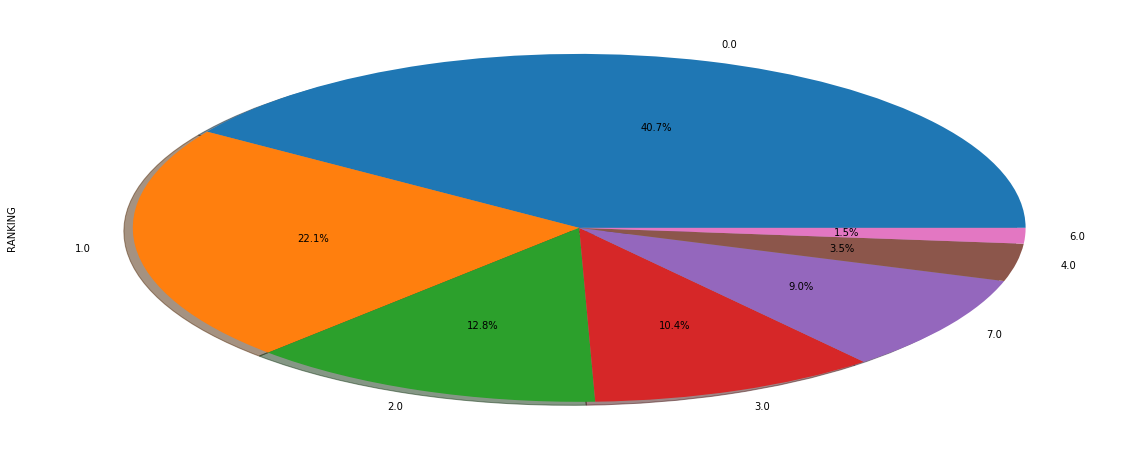

In [220]:
f,ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =dummy['RANKING'].value_counts().plot.pie(explode = [0]*7,autopct='%1.1f%%',ax = ax,shadow = True)
#fig = plt_pie.get_figure()
#fig.savefig('pic_pie.png', dpi = 300)

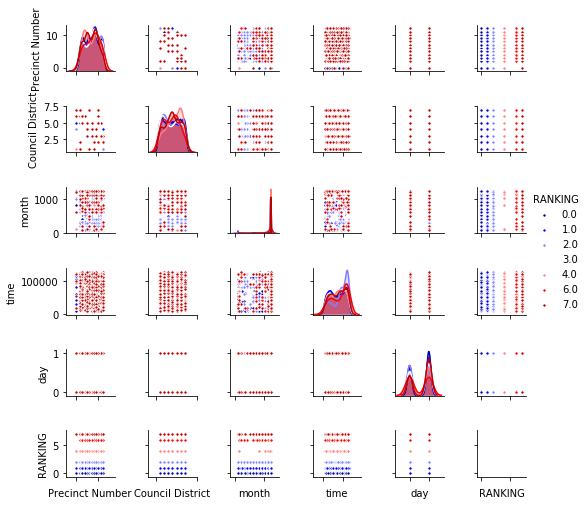

In [273]:
temp = dummy.iloc[:int(dummy.shape[0])].copy()


g = sns.pairplot(temp[[u'Precinct Number',u'Council District',u'uniq',u'month', u'time',  u'day',u'RANKING']], hue='RANKING', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])


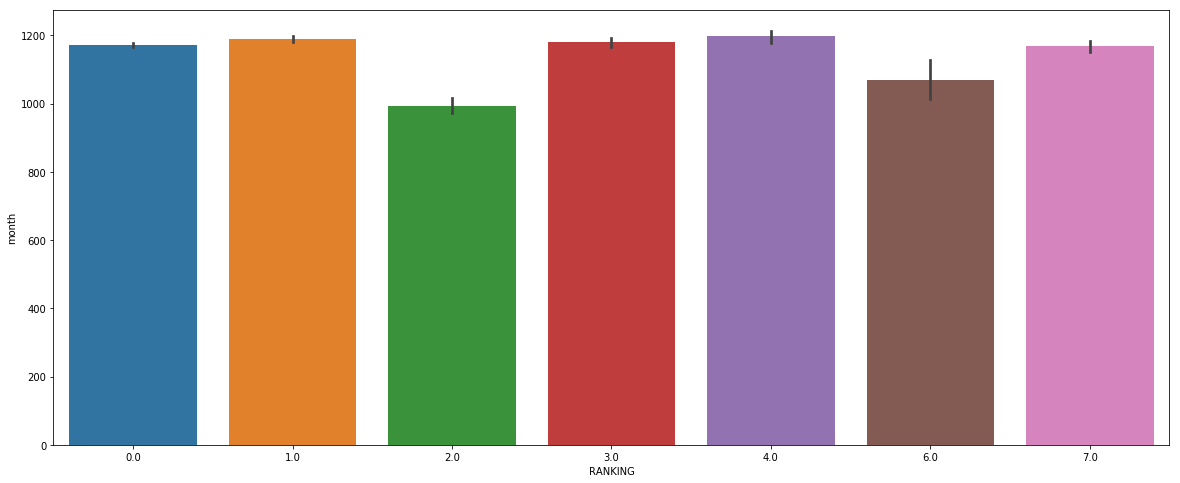

In [264]:
f,ax = plt.subplots(1,1,figsize=(20,8))
sns.barplot(dummy.RANKING,dummy.month, data=dummy,ax = ax)


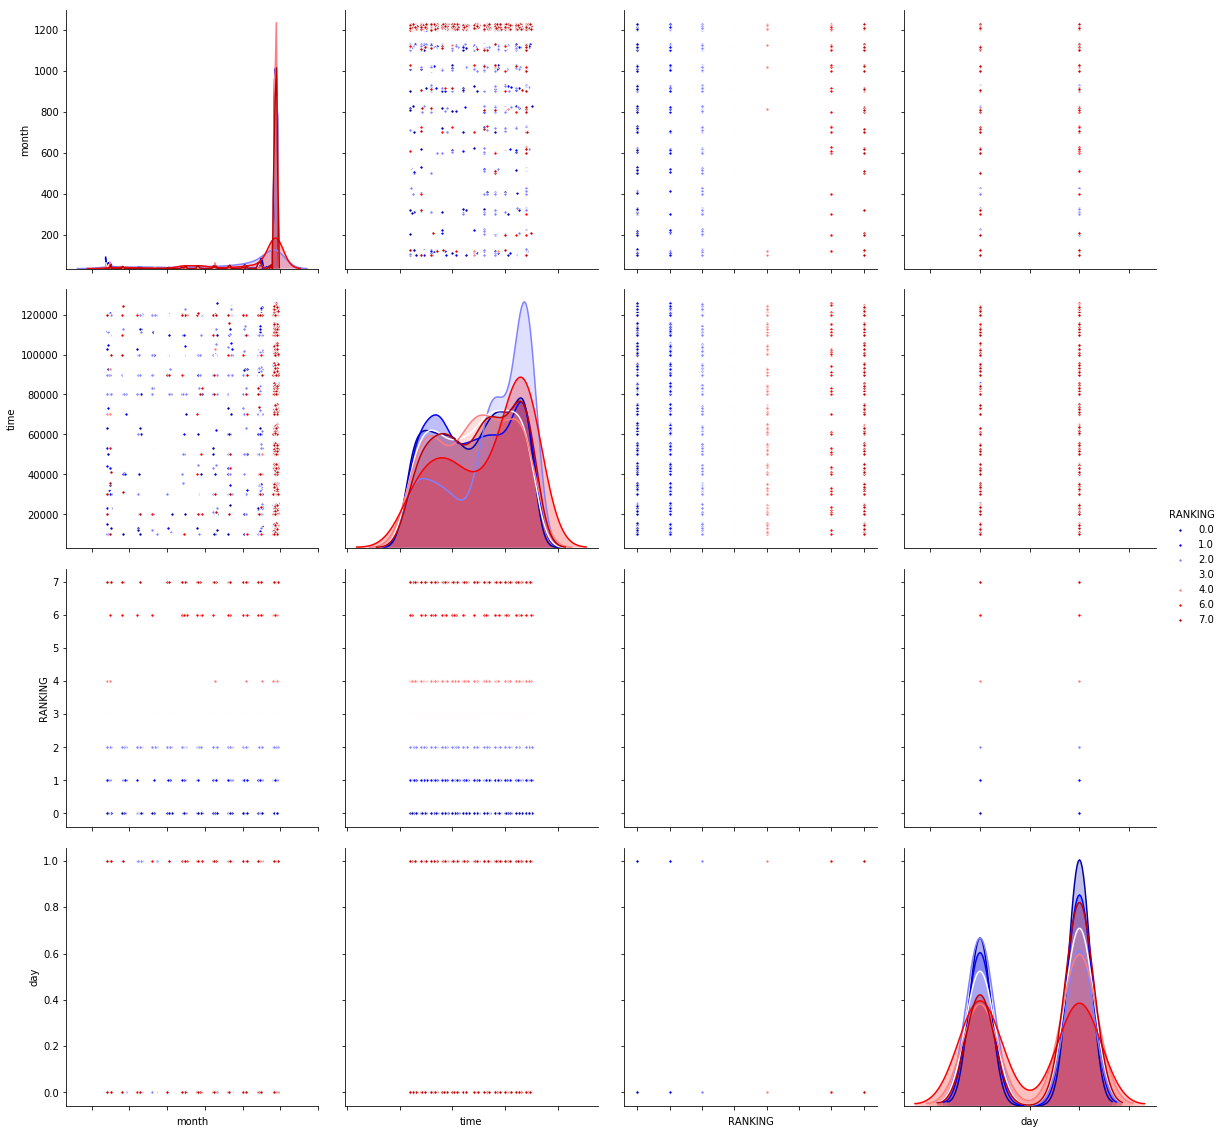

In [275]:
temp = dummy.iloc[:int(dummy.shape[0])].copy()
g = sns.pairplot(temp[[u'month', u'time',u'RANKING',u'day']], hue='RANKING', palette = 'seismic',size=4,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])

In [294]:
dummy.corr()

,Unnamed: 0,Crime ID,State Offense Code,Incident Time (24h),Day of Week (Sunday is 1),Hour of Day,Year,Scout Car Area,Precinct Number,Census Block GEOID,Council District,Zip Code,Longitude,Latitude,year,month,time,day,RANKING
Unnamed: 0,1.000000,0.020904,-0.004977,0.028868,0.004889,0.028608,NaN,-0.024207,-0.024464,0.018899,0.014255,NaN,0.006424,0.004215,NaN,-0.011189,0.008285,0.009584,-0.007937
Crime ID,0.020904,1.000000,0.015836,-0.100876,-0.018148,-0.096909,NaN,0.023632,0.023389,0.001397,-0.035926,NaN,-0.034961,-0.033497,NaN,-0.475811,0.144068,-0.050545,0.063800
State Offense Code,-0.004977,0.015836,1.000000,0.018387,0.002906,0.018399,NaN,-0.018628,-0.018392,-0.001451,-0.008062,NaN,-0.016880,-0.017535,NaN,-0.025910,0.019538,0.033482,0.463525
Incident Time (24h),0.028868,-0.100876,0.018387,1.000000,-0.000047,0.999665,NaN,-0.002090,-0.002207,-0.002165,-0.007332,NaN,0.006792,0.006810,NaN,0.099073,0.031035,0.838563,0.006266
Day of Week (Sunday is 1),0.004889,-0.018148,0.002906,-0.000047,1.000000,-0.000518,NaN,0.003399,0.003341,-0.006412,-0.010419,NaN,0.002480,0.004039,NaN,0.037046,0.004991,-0.000999,0.014889
Hour of Day,0.028608,-0.096909,0.018399,0.999665,-0.000518,1.000000,NaN,-0.001479,-0.001599,-0.002557,-0.007505,NaN,0.006503,0.006552,NaN,0.095195,0.032861,0.839488,0.003887
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scout Car Area,-0.024207,0.023632,-0.018628,-0.002090,0.003399,-0.001479,NaN,1.000000,0.999938,0.014052,-0.502051,NaN,0.044116,0.100912,NaN,-0.030894,-0.006427,-0.014300,-0.036481
Precinct Number,-0.024464,0.023389,-0.018392,-0.002207,0.003341,-0.001599,NaN,0.999938,1.000000,0.013754,-0.503764,NaN,0.043539,0.100709,NaN,-0.030754,-0.006331,-0.014406,-0.035926
Census Block GEOID,0.018899,0.001397,-0.001451,-0.002165,-0.006412,-0.002557,NaN,0.014052,0.013754,1.000000,0.042281,NaN,0.003358,-0.008064,NaN,0.007909,0.001651,-0.016283,0.005907
